In [114]:
import pandas as pd
path = 'C:\\Data Science\\kaggle regr competion\\train.csv'
dataset=pd.read_csv(path)
dataset.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [117]:
import matploblib.pyplot as plt
plt.style.use('classic')

In [115]:
high_nan_col=[]
for c in list(dataset.columns):
            if dataset[c].isnull().sum()/dataset.shape[0]>0.5:
                high_nan_col.append(c)

In [90]:
dataset.drop(high_nan_col,axis=1,inplace=True)
dataset.drop('Id',axis=1,inplace=True)
dataset.dropna(inplace=True)
dataset = dataset.drop(dataset[dataset.SalePrice>500000].index)

In [91]:
cat_col=list(dataset.select_dtypes(include=['object']).columns)
dataset=pd.get_dummies(dataset[cat_col], prefix=cat_col,drop_first=True)

In [92]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [105]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import RandomizedSearchCV

params_grid={'criterion':['mse','friedman_mse','mae'],
  
           'splitter': ['best','random'],

           'max_depth': [4,5,6,7,8,9],
    
           'min_weight_fraction_leaf':[0.0001,0.001,0.01,.05,0.1,0.2,0.3,0.4,0.47,0.5],

           'max_features': np.arange(4, 30),
                            
           'min_impurity_decrease':[0.0001,0.001,0.01,.05,0.1,0.2,0.3,0.4,0.47,0.5],
              
           'presort' :[False,True]}

dt_regr=DecisionTreeRegressor()

dt_regr_rs = RandomizedSearchCV(estimator=dt_regr, param_distributions=params_grid, n_iter=1000)
dt_regr_rs.fit(X,y)
print(dt_regr_rs)
# summarize the results of the random parameter search
print(dt_regr_rs.best_score_)
print(dt_regr_rs.best_estimator_)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
          fit_params={}, iid=True, n_iter=1000, n_jobs=1,
          param_distributions={'criterion': ['mse', 'friedman_mse', 'mae'], 'splitter': ['best', 'random'], 'max_depth': [4, 5, 6, 7, 8, 9], 'min_weight_fraction_leaf': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.47, 0.5], 'max_features': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29]), 'min_impurity_decrease': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.47, 0.5], 'presort': [False, True]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scorin

In [106]:
from sklearn.metrics import mean_absolute_error
dt_regr=dt_regr_rs.best_estimator_

dt_regr.fit(X_train,y_train)

y_pred=dt_regr.predict(X_test)

print(mean_absolute_error(y_test,y_pred))

0.03323182649250324


In [107]:
import numpy  as np
import matplotlib.pyplot as plt

In [108]:
def plot_feature_importances(clf, X_train, y_train=None, 
                             top_n=10, figsize=(8,8), print_table=False, title="Feature Importances"):
    '''
    plot feature importances of a tree-based sklearn estimator
    
    Note: X_train and y_train are pandas DataFrames
    
    Note: Scikit-plot is a lovely package but I sometimes have issues
              1. flexibility/extendibility
              2. complicated models/datasets
          But for many situations Scikit-plot is the way to go
          see https://scikit-plot.readthedocs.io/en/latest/Quickstart.html
    
    Parameters
    ----------
        clf         (sklearn estimator) if not fitted, this routine will fit it
        
        X_train     (pandas DataFrame)
        
        y_train     (pandas DataFrame)  optional
                                        required only if clf has not already been fitted 
        
        top_n       (int)               Plot the top_n most-important features
                                        Default: 10
                                        
        figsize     ((int,int))         The physical size of the plot
                                        Default: (8,8)
        
        print_table (boolean)           If True, print out the table of feature importances
                                        Default: False
        
    Returns
    -------
        the pandas dataframe with the features and their importance
        
    Author
    ------
        George Fisher
    '''
    
    __name__ = "plot_feature_importances"
    
   
    
   
            
    feat_imp = pd.DataFrame({'importance':clf.feature_importances_})    
    feat_imp['feature'] = X_train.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:top_n]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    feat_imp.plot.barh(title=title, figsize=figsize)
    plt.xlabel('Feature Importance Score')
    plt.show()
    
    if print_table:
        from IPython.display import display
        print("Top {} features in descending order of importance".format(top_n))
        display(feat_imp.sort_values(by='importance', ascending=False))
        
    return feat_imp

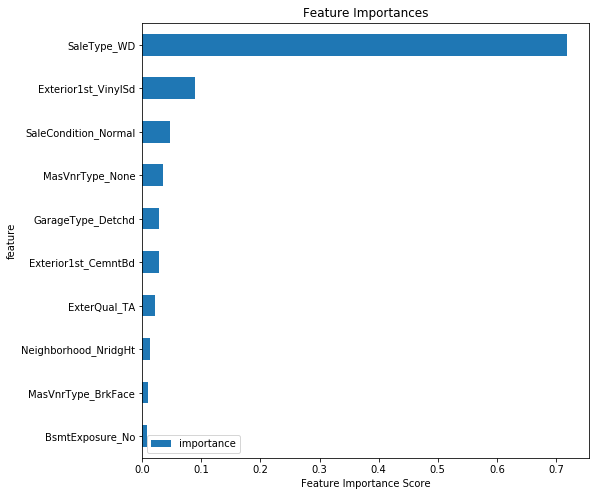

In [109]:
features=plot_feature_importances(dt_regr,X_train,y_train=None, 
                             top_n=10, figsize=(8,8), print_table=False, title="Feature Importances")


In [110]:
features

,importance
feature,
BsmtExposure_No,0.007948
MasVnrType_BrkFace,0.009639
Neighborhood_NridgHt,0.012654
ExterQual_TA,0.021567
Exterior1st_CemntBd,0.028319
GarageType_Detchd,0.028746
MasVnrType_None,0.034885
SaleCondition_Normal,0.047073
Exterior1st_VinylSd,0.089881


In [111]:

a=['Neighborhood_NoRidge',
   'BsmtQual_Gd',
   'BsmtExposure_Gd',
   'KitchenQual_Gd',
   'ExterQual_Gd',
   'ExterQual_TA',
   'GarageFinish_Unf']

In [112]:
X2=X[a]

In [113]:
X2.head(10)

,Neighborhood_NoRidge,BsmtQual_Gd,BsmtExposure_Gd,KitchenQual_Gd,ExterQual_Gd,ExterQual_TA,GarageFinish_Unf
0,0,1,0,1,1,0,0
1,0,1,1,0,0,1,0
2,0,1,0,1,1,0,0
3,0,0,0,1,0,1,1
4,1,1,0,1,1,0,0
5,0,1,0,0,0,1,1
6,0,0,0,1,1,0,0
7,0,1,0,0,0,1,0
8,0,0,0,0,0,1,1
9,0,0,0,0,0,1,0


In [103]:
from sklearn.model_selection import cross_val_score

def regressor_fitness_report(regressor, X, y, num_validations):
    Rsquare = cross_val_score(regressor, 
            X, y, scoring='r2', cv=num_validations)
    print("R square: " + str(round(100*Rsquare.mean(), 2)) + "%")
    explained_var= cross_val_score(regressor, 
            X, y, scoring='explained_variance', cv=num_validations)
    print("The explained variance is: " + str(round(100*explained_var.mean(), 2)) + "%")
    MAE = cross_val_score(regressor, 
            X, y, scoring='neg_median_absolute_error', cv=num_validations)
    print("The median absolute error is: " + str(round(-1*(MAE.mean()), 2)))
    RMSE = cross_val_score(regressor, 
            X, y, scoring='neg_mean_squared_error', cv=num_validations)
    print("The root mean squared error is: " + str(round((-1*(RMSE.mean()))**0.5, 2)))
    LOGRMSE = cross_val_score(regressor, 
            X, y, scoring='neg_mean_squared_log_error', cv=num_validations)
    print("The log mean squared error is: " + str(round(-1*(LOGRMSE.mean()), 2)))

In [104]:
regressor_fitness_report(dt_regr,X2,y,5)

R square: 16.54%
The explained variance is: 16.66%
The median absolute error is: 0.0
The root mean squared error is: 0.26
The log mean squared error is: 0.03
